In [682]:
from seaborn import load_dataset
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

In [683]:
df = pd.read_csv('/Users/mikeredshaw/Documents/Schulich MBAN/AI in Business/Assignment 1 - Titanic/train.csv')


In [684]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [685]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [686]:
df = df.drop(['PassengerId', 'Name', 'Cabin', 'Ticket'], axis=1)


In [687]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


<Axes: xlabel='Age', ylabel='Count'>

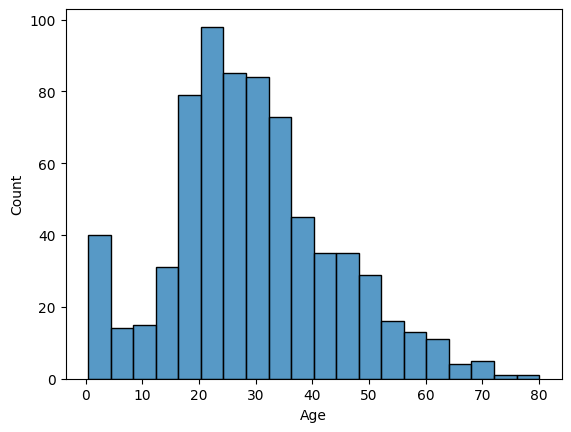

In [688]:
sns.histplot(data=df, x='Age')

In [689]:
df['Age'].mean()

29.69911764705882

In [690]:
df.groupby('Sex')['Age'].mean()


Sex
female    27.915709
male      30.726645
Name: Age, dtype: float64

In [691]:
df['Age'].unique()

array([22.  , 38.  , 26.  , 35.  ,   nan, 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  , 28.  ,
        8.  , 19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  ,
       49.  , 29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  ,
       16.  , 25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  ,
       71.  , 37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 ,
       51.  , 55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  ,
       45.5 , 20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  ,
       60.  , 10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  ,
       70.  , 24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

In [692]:
df['Age'] = df['Age'].fillna(df.groupby('Sex')['Age'].transform('median'))
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])


In [693]:
df['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [694]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [695]:
df.groupby('Embarked').count()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
Embarked,,,,,,,
C,168,168,168,168,168,168,168
Q,77,77,77,77,77,77,77
S,646,646,646,646,646,646,646


In [696]:
df['Pclass'].unique()

array([3, 1, 2])

In [697]:
df.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object

In [698]:
df['Embarked'] = df['Embarked'].map({'S': 1, 'C': 2, 'Q': 3})
df['Sex'] = df['Sex'].map({'male': 1, 'female': 2})

In [699]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,1
1,1,1,2,38.0,1,0,71.2833,2
2,1,3,2,26.0,0,0,7.9250,1
3,1,1,2,35.0,1,0,53.1000,1
4,0,3,1,35.0,0,0,8.0500,1


In [700]:
df.describe(include='all')

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,1.352413,29.441268,0.523008,0.381594,32.204208,1.361392
std,0.486592,0.836071,0.477990,13.018747,1.102743,0.806057,49.693429,0.635673
min,0.000000,1.000000,1.000000,0.420000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,2.000000,1.000000,22.000000,0.000000,0.000000,7.910400,1.000000
50%,0.000000,3.000000,1.000000,29.000000,0.000000,0.000000,14.454200,1.000000
75%,1.000000,3.000000,2.000000,35.000000,1.000000,0.000000,31.000000,2.000000
max,1.000000,3.000000,2.000000,80.000000,8.000000,6.000000,512.329200,3.000000


In [701]:
df['Child'] = (df['Age'] < 16).astype(int)
df['Y_Adult'] = ((df['Age'] >= 16) & (df['Age'] <= 30)).astype(int)
df['Adult'] = ((df['Age'] >= 31) & (df['Age'] <= 60)).astype(int)
df['Elder'] = (df['Age'] > 60).astype(int)


In [702]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Child,Y_Adult,Adult,Elder
0,0,3,1,22.0,1,0,7.2500,1,0,1,0,0
1,1,1,2,38.0,1,0,71.2833,2,0,0,1,0
2,1,3,2,26.0,0,0,7.9250,1,0,1,0,0
3,1,1,2,35.0,1,0,53.1000,1,0,0,1,0
4,0,3,1,35.0,0,0,8.0500,1,0,0,1,0


In [703]:
df_death = df.groupby('Survived').agg({'Survived': 'sum','Age': 'mean', 'Fare': 'mean', 'SibSp': 'mean', 'Parch': 'mean','Child': 'sum','Y_Adult': 'sum','Adult': 'sum','Elder': 'sum','Embarked': lambda x: x.mode()[0], 'Pclass': lambda x: x.mode()[0]})


In [704]:
df_death.head()

,Survived,Age,Fare,SibSp,Parch,Child,Y_Adult,Adult,Elder,Embarked,Pclass
Survived,,,,,,,,,,,
0,0,30.193989,22.117887,0.553734,0.329690,34,334,162,17,1,3
1,342,28.232953,48.395408,0.473684,0.464912,49,169,119,5,1,1


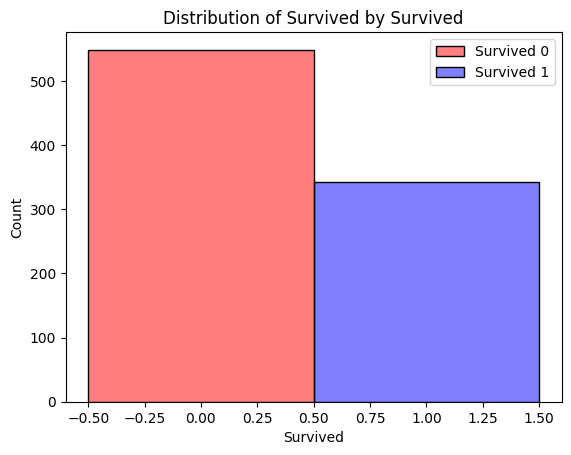

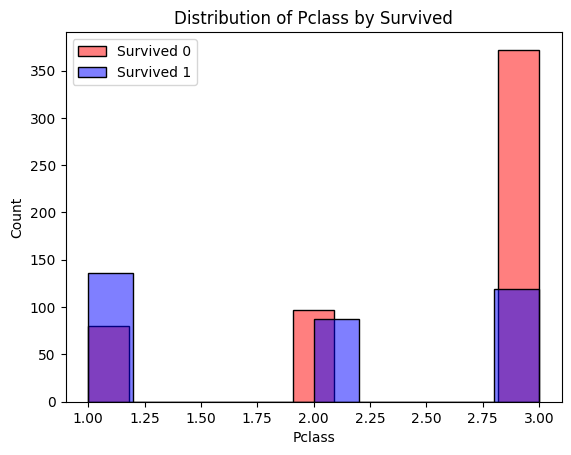

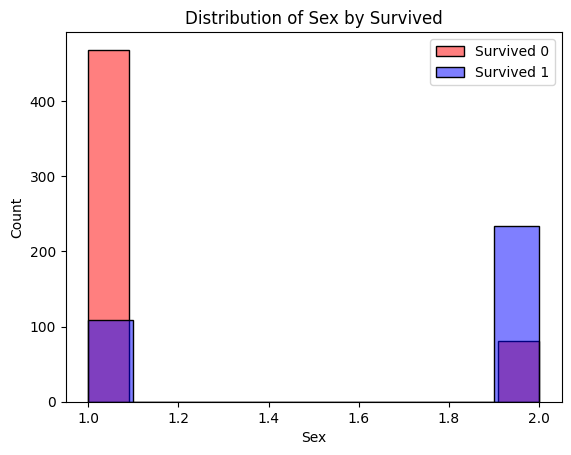

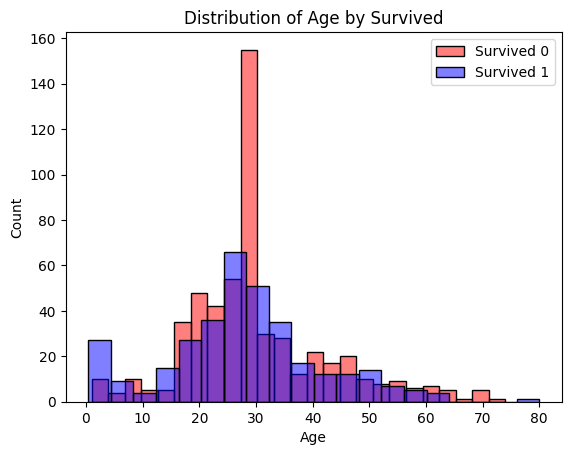

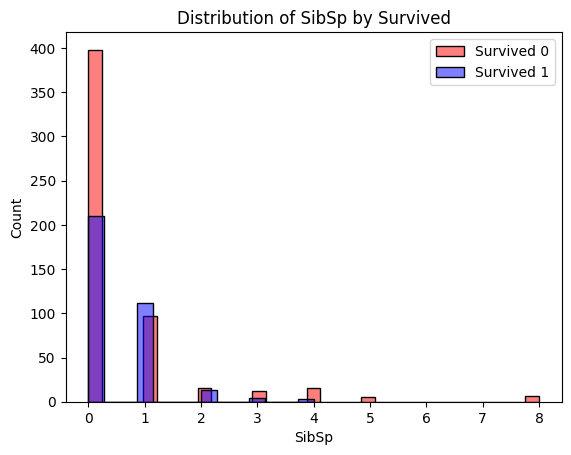

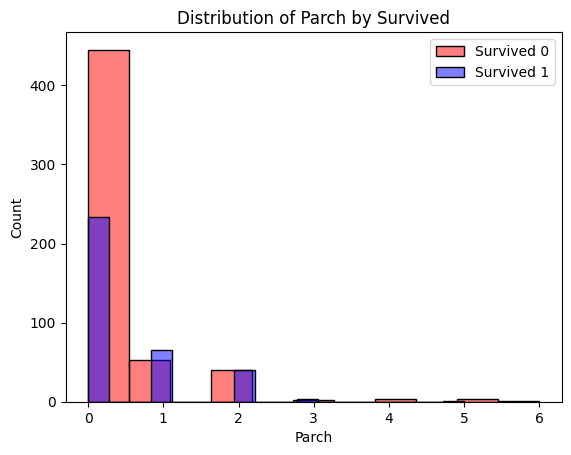

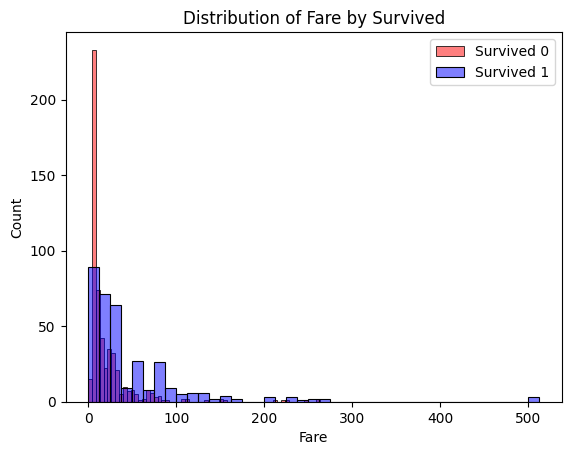

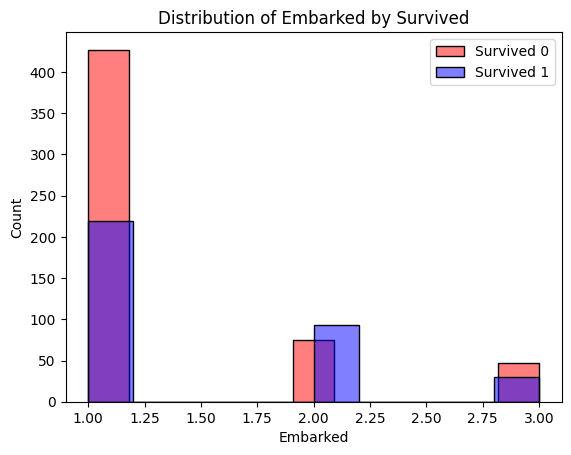

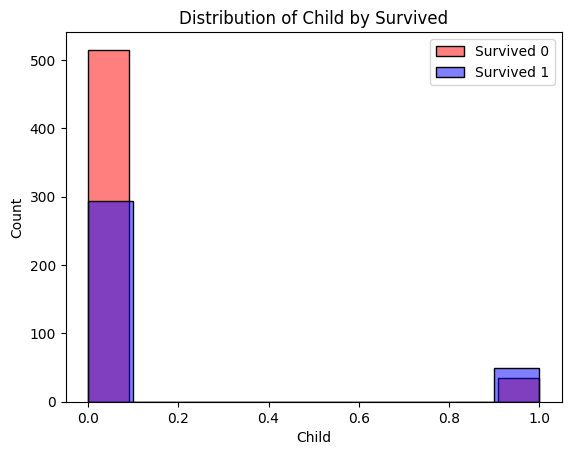

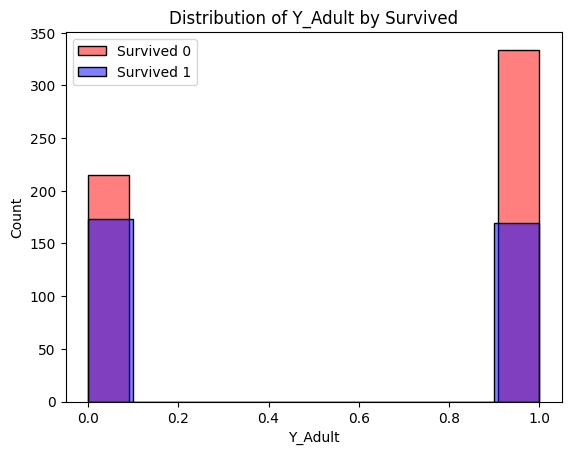

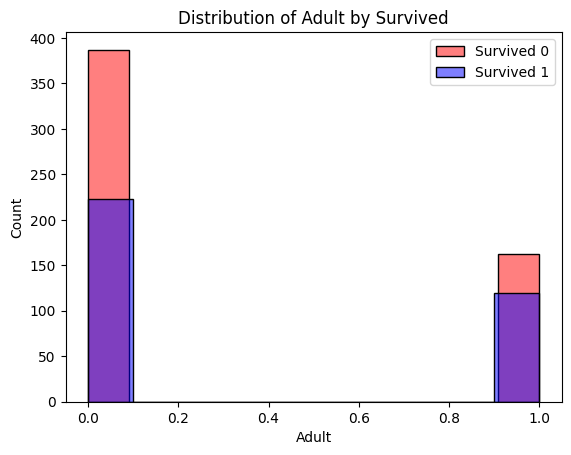

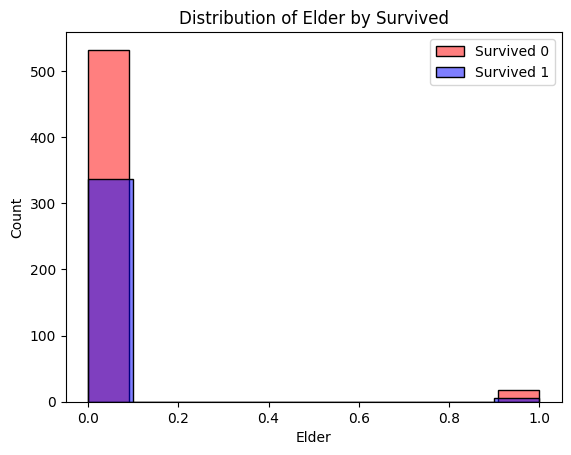

In [705]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter the dataframe based on the "survived" column
df_survived_0 = df[df['Survived'] == 0]
df_survived_1 = df[df['Survived'] == 1]

# Iterate over each column and create overlapping plots
for column in df.columns:
    if column != 'survived':
        plt.figure()
        sns.histplot(data=df_survived_0, x=column, label='Survived 0', color='red', alpha=0.5)
        sns.histplot(data=df_survived_1, x=column, label='Survived 1', color='blue', alpha=0.5)
        plt.legend()
        plt.title(f'Distribution of {column} by Survived')
        plt.show()


In [706]:
df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked', 'Child', 'Y_Adult', 'Adult', 'Elder'],
      dtype='object')

In [712]:
cat_columns = ['Pclass', 'Sex', 'Embarked', 'Child', 'Y_Adult','Adult', 'Elder']
num_columns = ['Age', 'Fare', 'SibSp', 'Parch']
target = 'Survived'

In [713]:
X_train, X_test, y_train, y_test = train_test_split(df[cat_columns + num_columns], df[target], test_size=0.2, random_state=42)

In [714]:
cat_transformer = Pipeline(steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))])
num_transformer = Pipeline(steps=[('scaler', StandardScaler())])
preprocessor = ColumnTransformer(transformers=[('cat', cat_transformer, cat_columns),
                                               ('num', num_transformer, num_columns)])


In [715]:
# Create a logistic regression model with preprocessor
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('classifier', LogisticRegression())])

# Fit the model on the training data
model.fit(X_train, y_train)

# Predict on the test data
y_pred = model.predict(X_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy
print("Accuracy:", accuracy)


Accuracy: 0.8044692737430168


In [716]:
from sklearn.tree import DecisionTreeClassifier

# Create a decision tree model with preprocessor
decision_tree_model = Pipeline(steps=[('preprocessor', preprocessor),
                                      ('classifier', DecisionTreeClassifier())])

# Fit the model on the training data
decision_tree_model.fit(X_train, y_train)

# Predict on the test data
y_pred_tree = decision_tree_model.predict(X_test)

# Calculate the accuracy
accuracy_tree = accuracy_score(y_test, y_pred_tree)

# Print the accuracy
print("Decision Tree Accuracy:", accuracy_tree)


Decision Tree Accuracy: 0.7821229050279329
